In [9]:
import pandas as pd
import datetime as dt
import pandasql as ps
import os
import zipfile as zp
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb

DIR=r'C:\Users\anuj\Downloads'
ZIp='archive (8).zip'

os.chdir(DIR)
zf = zp.ZipFile(f'{ZIp}')

dfs={}
for name in zf.namelist():
    df_name= name.replace('.csv','')
    dfs[df_name]=pd.read_csv(zf.open(name,mode='r'),encoding='latin')

df=dfs['LS_2.0']
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.replace('\n','_')
df['LIABILITIES']=df['LIABILITIES'].astype(str).apply(lambda x: x.replace('\n','-'))
df['ASSETS']=df['ASSETS'].astype(str).apply(lambda x: x.replace('\n','-'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].astype(str).apply(lambda x: x.replace('Not Available','0'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].apply(lambda x: float(x))
df['EDUCATION']=df['EDUCATION'].astype(str).apply(lambda x: x.replace('\n',''))

### Null and Duplicate Checks

In [2]:
df[df.duplicated()]## Check duplicates
df.isnull().values.any() ########Check NUlls
df.isnull().isnull().sum() ########Check NUlls by each column

STATE                                       0
CONSTITUENCY                                0
NAME                                        0
WINNER                                      0
PARTY                                       0
SYMBOL                                      0
GENDER                                      0
CRIMINAL_CASES                              0
AGE                                         0
CATEGORY                                    0
EDUCATION                                   0
ASSETS                                      0
LIABILITIES                                 0
GENERAL_VOTES                               0
POSTAL_VOTES                                0
TOTAL_VOTES                                 0
OVER_TOTAL_ELECTORS__IN_CONSTITUENCY        0
OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY    0
TOTAL_ELECTORS                              0
dtype: int64

### # Constituencies by State

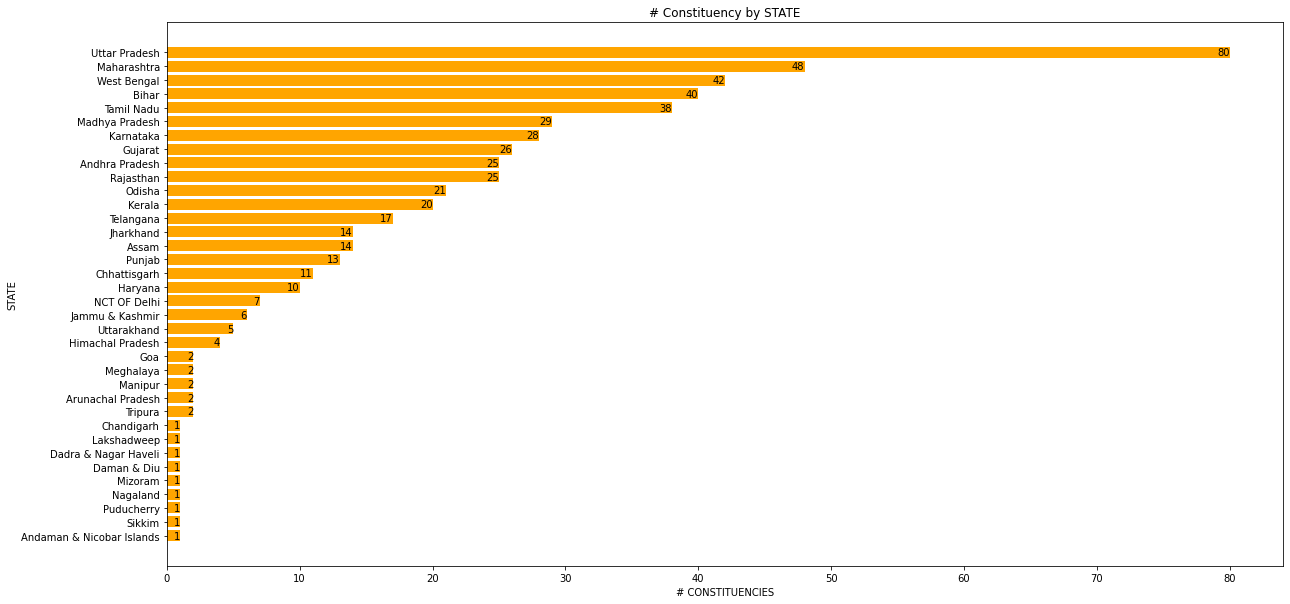

In [155]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x=x[i],y=y[i],s=x[i],fontsize=10,va='center',ha='right',color='black')

const=pd.DataFrame(df['CONSTITUENCY'].groupby(df['STATE']).nunique()).sort_values(by='CONSTITUENCY',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,10)
y=const['STATE']
x=const['CONSTITUENCY']
plt.barh(y=y,width=x,height=0.8,color='orange')
plt.title('# Constituency by STATE')
plt.ylabel('STATE')
plt.xlabel('# CONSTITUENCIES')
addlabels(x,y)
plt.show()

In [107]:
type(const)

pandas.core.frame.DataFrame

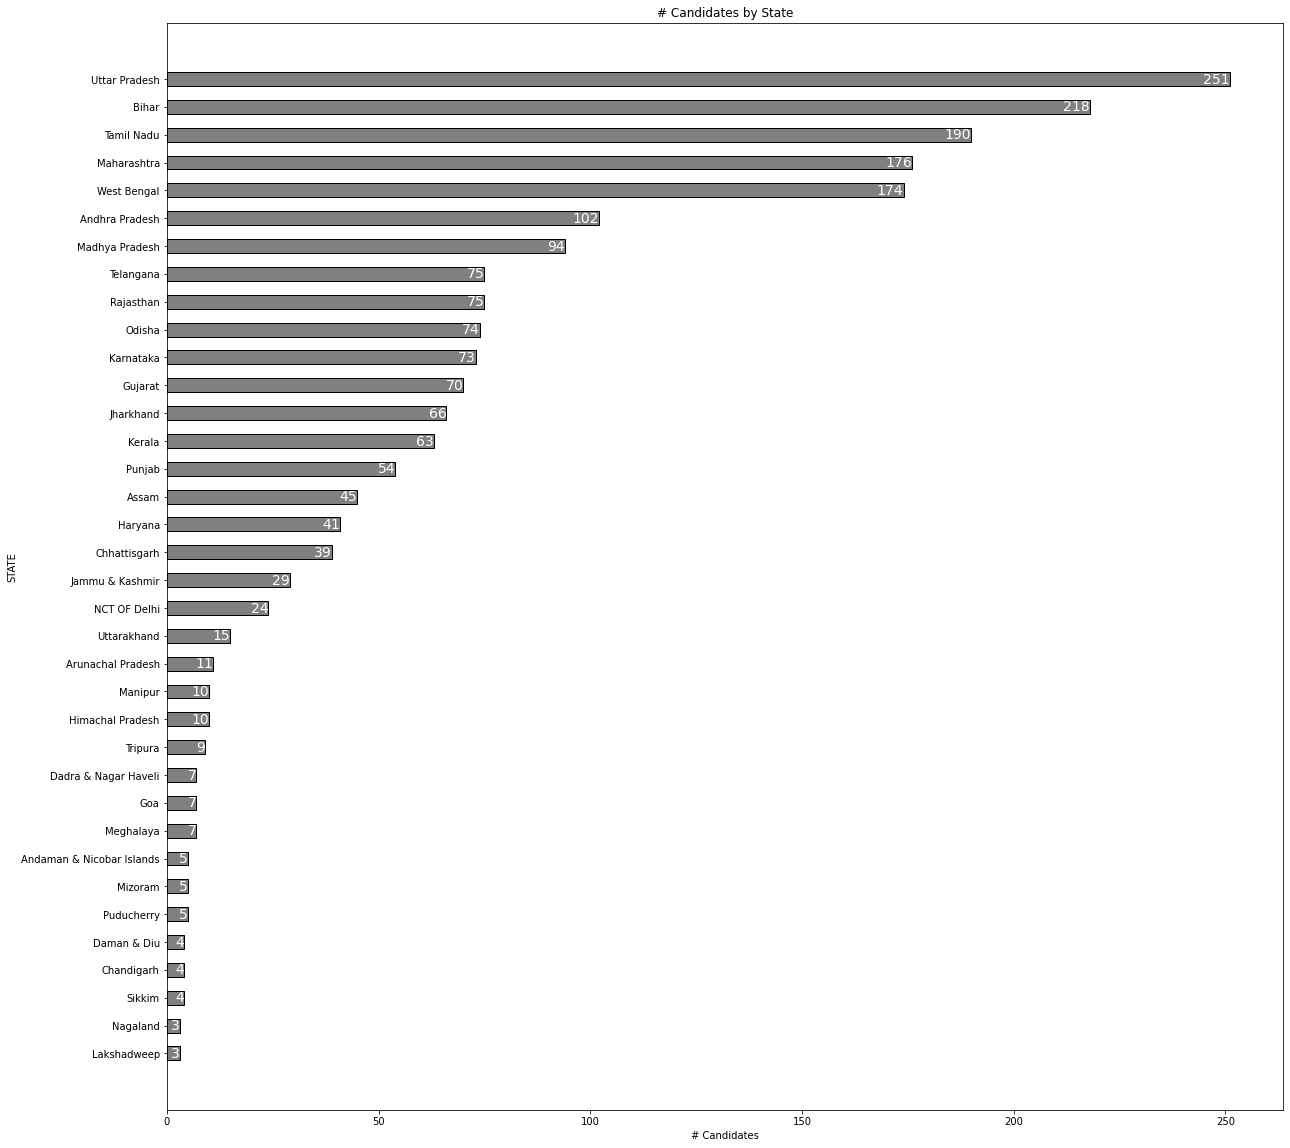

In [139]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x=x[i],y=y[i],s=x[i],fontsize=14,va='center',ha='right',color='white')

const=pd.DataFrame(df['NAME'].groupby(df['STATE']).nunique()).sort_values(by='NAME',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,20)
y=const['STATE']
x=const['NAME']
plt.barh(y=y,width=x,height=0.5,fc='gray',ec='black')
plt.title('# Candidates by State')
plt.ylabel('STATE')
plt.xlabel('# Candidates')
addlabels(x,y)
plt.show()


### 1. How many candidates have criminial cases and have won elections in 2019? Which state has maximum?

In [7]:
q1=df[['NAME','CRIMINAL_CASES','WINNER','STATE']]

q1.loc[q1['CRIMINAL_CASES'] >0, 'is_criminal'] = 1
q1.loc[q1['CRIMINAL_CASES'] ==0, 'is_criminal'] = 0

print("How many candidates have criminial cases and have won elections in 2019?: ",q1['NAME'].groupby([q1['is_criminal'],q1['WINNER']]).nunique().unstack().iloc[1,1])
print("Which state has maximum criminal winners: ",q1[(q1['WINNER']==1)&(q1['is_criminal']==1)]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=False).head(1))

How many candidates have criminial cases and have won elections in 2019?:  233
Which state has maximum criminal winners:  STATE
Uttar Pradesh    42
Name: NAME, dtype: int64


### 2. Are there any female candidates with criminal cases ? which state shows this trend

STATE with maximum criminal female candidates:                 NAME
STATE              
Uttar Pradesh    16
STATE with least criminal female candidates:         NAME
STATE      
Assam     1


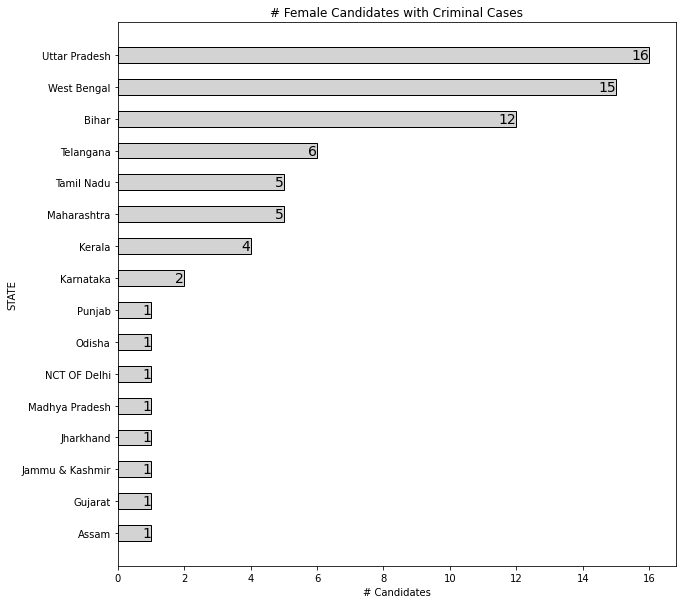

In [458]:
q1=df[['NAME','CRIMINAL_CASES','WINNER','STATE','GENDER']]
q1.loc[q1['CRIMINAL_CASES'] >0, 'is_criminal'] = 1
q1.loc[q1['CRIMINAL_CASES'] ==0, 'is_criminal'] = 0

print('STATE with maximum criminal female candidates: ',pd.DataFrame(q1[(q1['is_criminal']==1)&(q1['GENDER']=='FEMALE')]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=False)).head(1))
print('STATE with least criminal female candidates: ',pd.DataFrame(q1[(q1['is_criminal']==1)&(q1['GENDER']=='FEMALE')]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=True)).head(1))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x=x[i],y=y[i],s=x[i],fontsize=14,va='center',ha='right',color='black')

q2=pd.DataFrame(q1[(q1['is_criminal']==1)&(q1['GENDER']=='FEMALE')]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=True))
q2['STATE']=q2.index
q2=q2.reset_index(drop=True)
fig=plt.gcf()
fig.set_size_inches(10,10)
y=q2['STATE']
x=q2['NAME']
plt.barh(y=y,width=x,height=0.5,fc='lightgray',ec='black')
plt.title('# Female Candidates with Criminal Cases')
plt.ylabel('STATE')
plt.xlabel('# Candidates')
addlabels(x,y)
plt.show()




### 3. Which state has maximum old candidates? and whats the average age?

In [172]:
q1=df[['NAME','AGE','STATE','GENDER']]

pd.DataFrame(q1['AGE'].groupby([q1['STATE']]).mean().sort_values(ascending=False)).iloc[0:1,0]

STATE
Chandigarh    64.5
Name: AGE, dtype: float64

### 4. How many parties are there at National Level? Represent Them on a pie . Slices to be based on # Candidates

Number of Parties at National Level:  133
Top 10 Parties account for  74.5% . Rest 25.5%  is accounted by 123 Parties


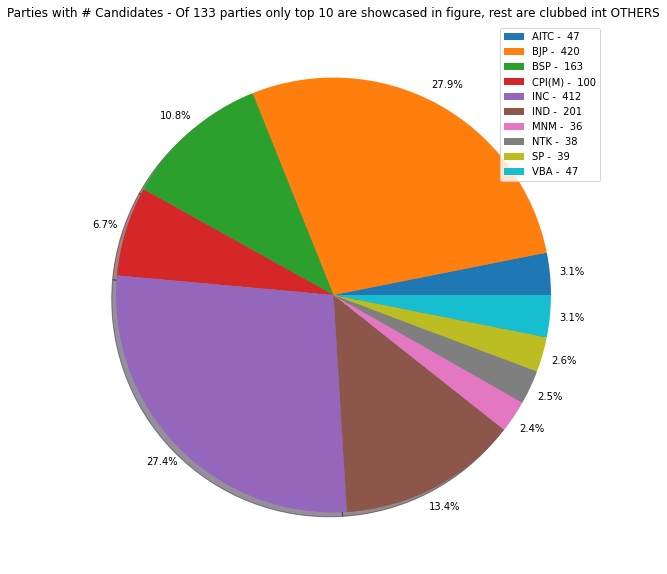

In [430]:

print('Number of Parties at National Level: ',df.PARTY.nunique())


fig=plt.gcf()
fig.set_size_inches(10,10)

q5=pd.DataFrame(df.groupby('PARTY')['NAME'].nunique().rank(ascending=False).sort_values(ascending=True))
q5['PARTY']=q5.index  
q5=q5.reset_index(drop=True)
q5=q5.join(pd.DataFrame(df.groupby('PARTY')['NAME'].nunique()),on='PARTY',how='left',lsuffix='_RANK')
q5.loc[q5['NAME_RANK'] >10, 'PARTY'] = 'OTHERS'

#q5.groupby(['PARTY'])['NAME'].sum().plot(kind='pie',subplots=True,figsize=(10,10))
plt.pie(x=q5[q5['PARTY']!='OTHERS'].groupby(['PARTY'])['NAME'].sum(),shadow=True,autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Parties with # Candidates - Of 133 parties only top 10 are showcased in figure, rest are clubbed int OTHERS')
plt.legend(pd.DataFrame(q5[q5['PARTY']!='OTHERS'].groupby(['PARTY'])['NAME'].sum()).index + ' -  ' + (q5[q5['PARTY']!='OTHERS'].groupby(['PARTY'])['NAME'].sum()).astype(str))
print('Top 10 Parties account for ', "{:.1%}".format(((q5[q5['PARTY']!='OTHERS']['NAME'].sum())/q5['NAME'].sum())),'. Rest', "{:.1%}".format(((q5[q5['PARTY']=='OTHERS']['NAME'].sum())/q5['NAME'].sum())),' is accounted by 123 Parties' )
plt.show()




### 5. Which state has most qualified Candidates?

<AxesSubplot:ylabel='STATE'>

<Figure size 720x720 with 0 Axes>

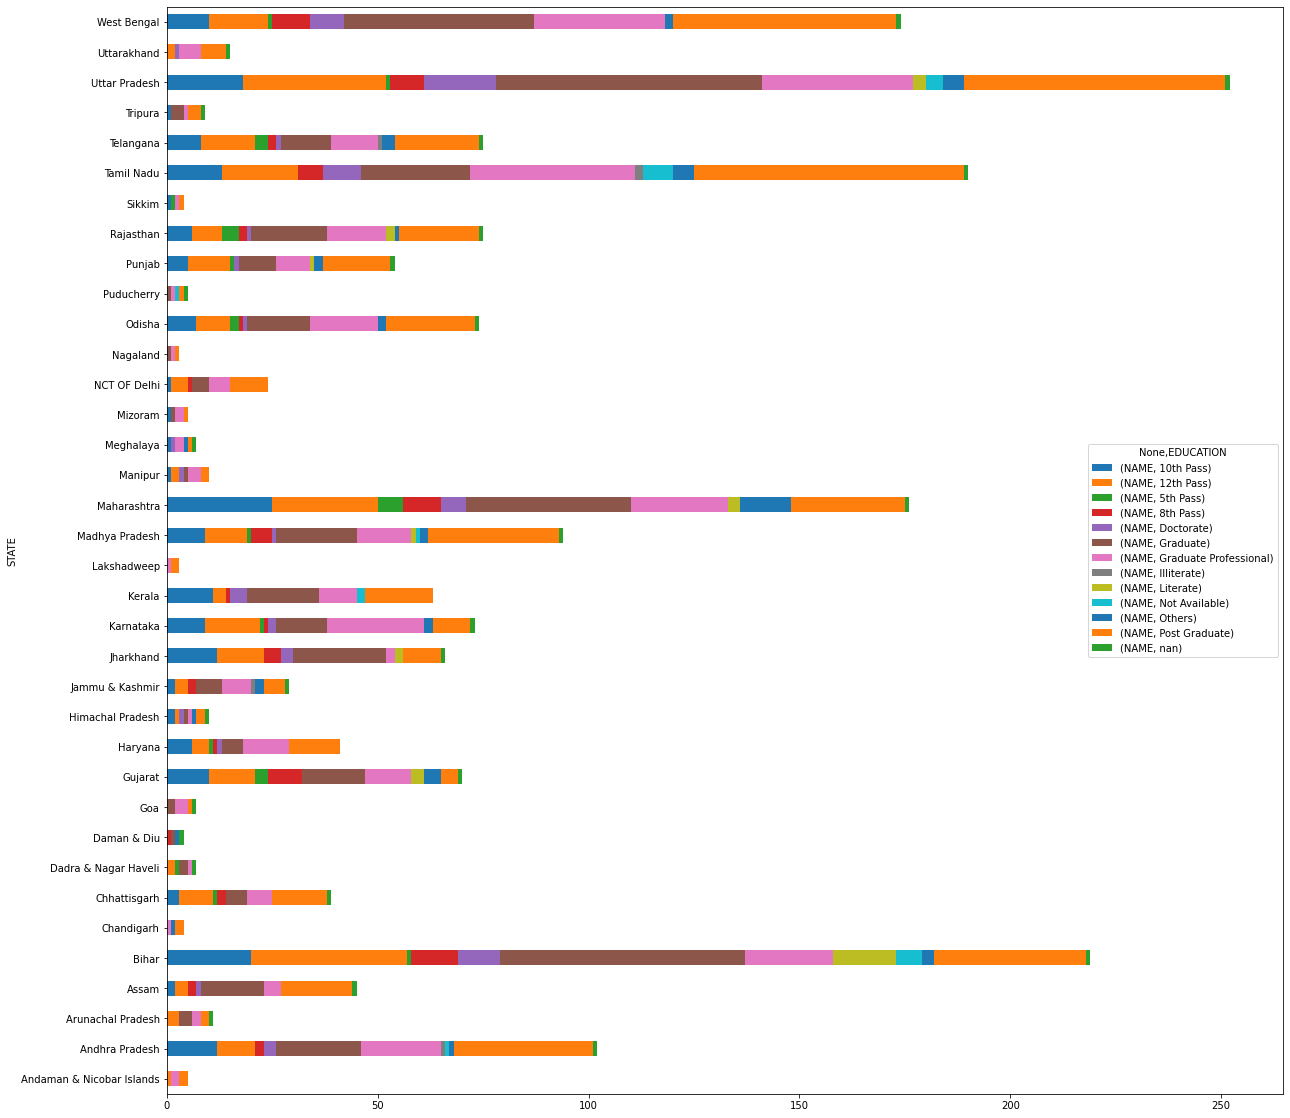

In [456]:
df.head()
fig=plt.gcf()
fig.set_size_inches(10,10)

pd.DataFrame(df.groupby(['STATE','EDUCATION'])['NAME'].nunique()).sort_values(by='NAME',ascending=False).unstack().plot(kind='barh',stacked=True,figsize=(20,20))

### 6. Which party has most Gen category candidates?

### 7. Which state has the richest candidates? Which party do they belong to?

### 8. Which consituency was voted with highest NOTA?

### 9. In each state what is the turn-up percentage of voters?

### 10. Which state has the highest #female candidates?

### Are there any all male or all female candidates in a constituency?

### 11. What is the correlation b/w #candidates and #consituency?

### 12. Is there a scenario where in the states with low population density are using postal votes? Test the hypotheses

### 13. What is the highest difference of votes between loosing and winning candidate?

### 14. What is the lowest difference of votes between loosing and winning candidate?

### 15. Which candidate has the lowest net assets? Which constituecy they belong to?

### 16. What is most wierdest party symbol? Which constituency and in which state is it?

### 17. Which party has only female or only male candidates?

### 18. Which two or more parties have same symbol and what is the symbol?

### 19. Which state has most 18+ voters registered?

### 20. How many candidates have Gandhi as surname? and How many of then have actually won in their constituency?

### 21. Are people voting or even considering the education of the candidate?

### 22. Check if the criminal cases have any relation with Educational qualification of the candidate?

### 23. Check Hypothesis - High Qualified Candidates are getting more votes?

In [ ]:
state = input('Enter the State Name:')
pd.DataFrame(df[df['CONSTITUENCY'].str.contains(state)])